See what fell out

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import numpy as np
import tensorflow as tf
import re
import os

subs = np.linspace(0.0, 0.9, 5)
colors = [cmap.viridis(x) for x in subs]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [30]:
def load_tv_result(filename):
    with open(filename) as f:
        return np.array([[float(s) for s in line.split(',')] for line in f])

def load_all_ranks(folder):
    """Try to load as much as possible"""
    ranks = [os.path.join(folder, rank) for rank in os.listdir(folder)]
    
    all_ranks = {}
    
    for rank in ranks:
        fname = os.path.join(rank, 'train_valid_loss.csv')
        data = load_tv_result(fname)
        # get the actual rank
        rank = os.path.basename(rank).split('-')[-1]
        all_ranks[rank] = data
    return all_ranks

In [31]:
def plot_dict(data_dict):
    
    ax = plt.gca()
    ax.set_prop_cycle(None)
    
    items = sorted(data_dict.items(), key=lambda x: int(x[0]))
    
    for label, data in items:
        exes = np.arange(data.shape[0])
        plt.plot(exes, data[:, 1], ls='--')
    ax.set_prop_cycle(None)
    for label, data in items:
        exes = np.arange(data.shape[0])
        plt.plot(exes, data[:, 2], label=label)
    plt.legend()

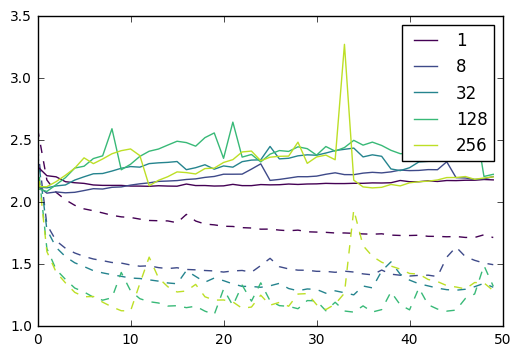

In [32]:
data = load_all_ranks('../wp_grid/cp-gate-combined-linear/')
plot_dict(data)

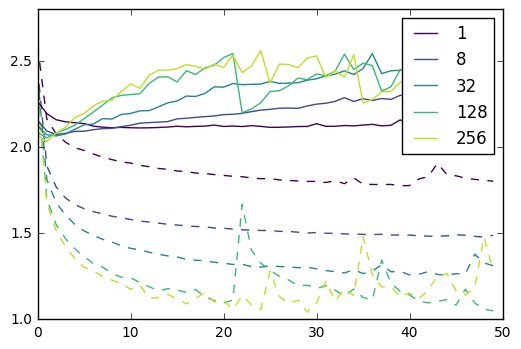

In [34]:
data = load_all_ranks('../wp_grid/cp-gate-combined-relu/')
plot_dict(data)

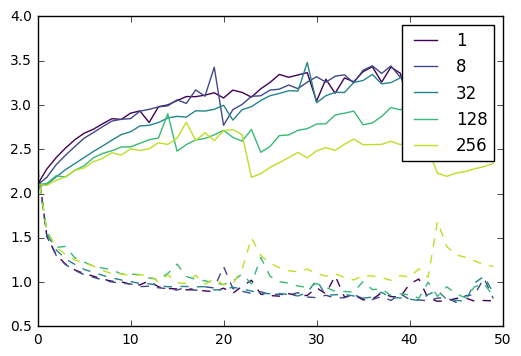

In [35]:
data = load_all_ranks('../wp_grid/cp-gate-relu/')
plot_dict(data)

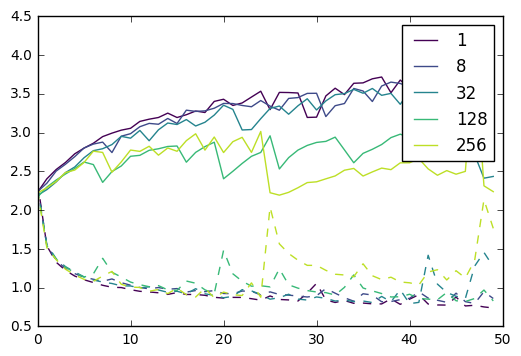

In [36]:
data = load_all_ranks('../wp_grid/cp-gate-linear/')
plot_dict(data)

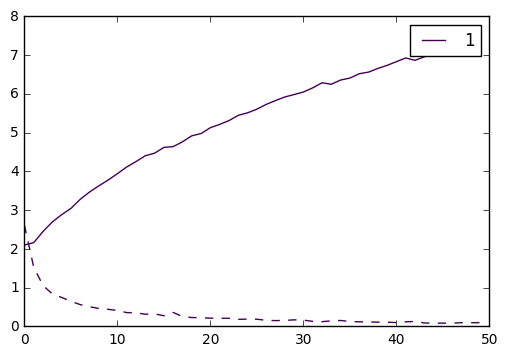

In [37]:
data = load_all_ranks('../wp_grid/gru-linear/')
plot_dict(data)

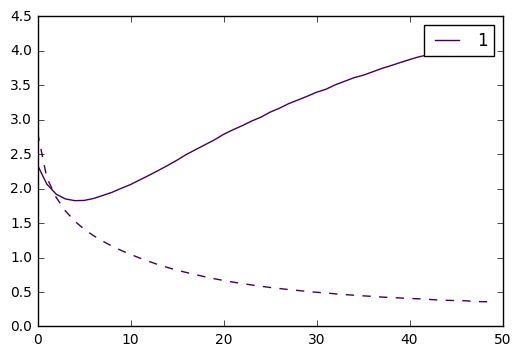

In [38]:
data = load_all_ranks('../wp_grid/lstm-linear/')
plot_dict(data)

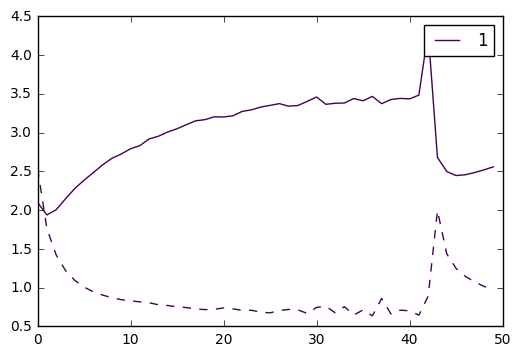

In [39]:
data = load_all_ranks('../wp_grid/tf-vanilla-linear/')
plot_dict(data)

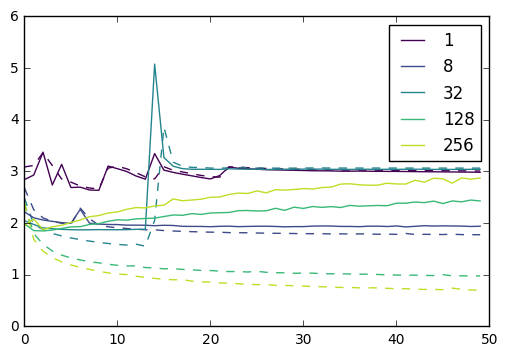

In [40]:
data = load_all_ranks('../wp_grid/simple_cp-combined-tanh/')
plot_dict(data)

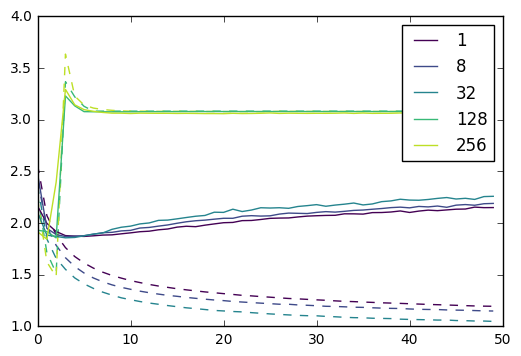

In [41]:
data = load_all_ranks('../wp_grid/simple_cp-tanh/')
plot_dict(data)